In [70]:
# importing libraries
from time import time
import multiprocessing
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob
import skimage
import torch
import SimpleITK as sitk
import skimage, torch, torchvision
import torchxrayvision as xrv
import torchvision
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import random
import logging
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,auc,accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from keras.models import load_model
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [66]:
def AUC_ROC_Binary(y_true,y_score):
    y_true=y_true.reshape((-1,1))
    y_score=y_score.reshape((-1,1))
    fpr, tpr, thresholds = roc_curve(y_true, y_score,pos_label=1)
    score_value = roc_auc_score(y_true=y_true, y_score=y_score)
    plt.figure(dpi=150)
    plt.plot(fpr, tpr,label="White vs African-American/Asian \n (AUC={:.2f})".format(score_value))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC for the Prediction of Binary Race (White:P vs non-White:N)')
    plt.plot(y_score,y_score,'--k')
    plt.grid(which='both')
    plt.legend()
    plt.show()

def AUC_Precision_Recall(y_true,y_score):
    y_true=y_true.reshape((-1,1))
    y_score=y_score.reshape((-1,1))
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    plt.figure(dpi=150)
    auc_score = auc(y=precision, x=recall)
    # ,label="White vs African-American/Asian \n (AUC={:.2f})".format(score_value)
    plt.plot(recall[::5],precision[::5],label="White vs African-American/Asian \n (precision-recall AUC={:.2f})".format(auc_score))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('AUC-ROC for the Prediction of Binary Race (White:P vs non-White:N)')
    plt.grid(which='both')
    plt.legend()
    plt.show()

def prob2categ(y_true,y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    gmeans = np.sqrt(tpr * (1-fpr))
    return gmeans[np.argmax(gmeans)]



253/253 [==============================] - 0s 836us/step


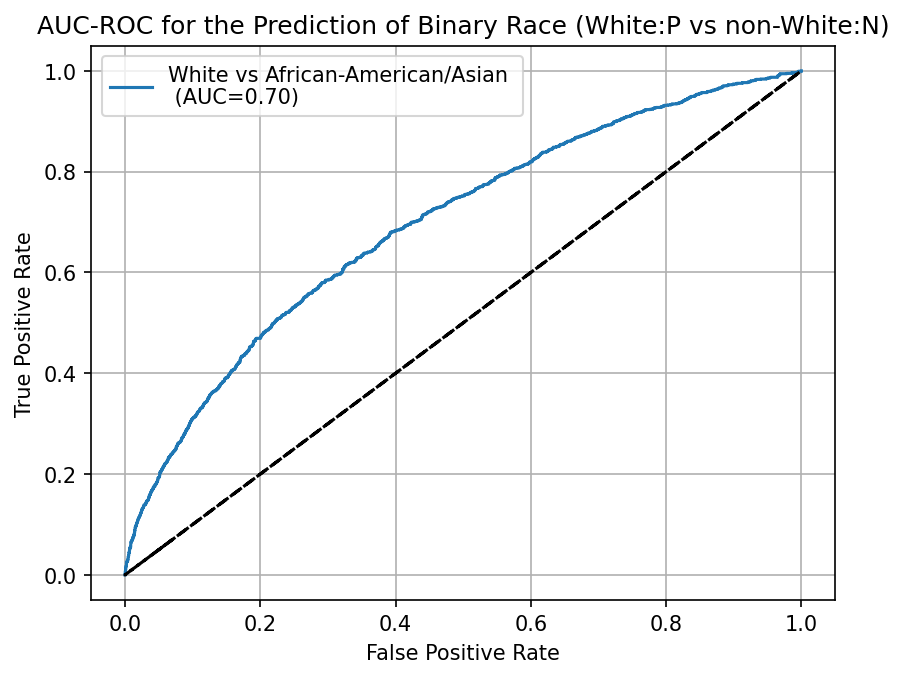

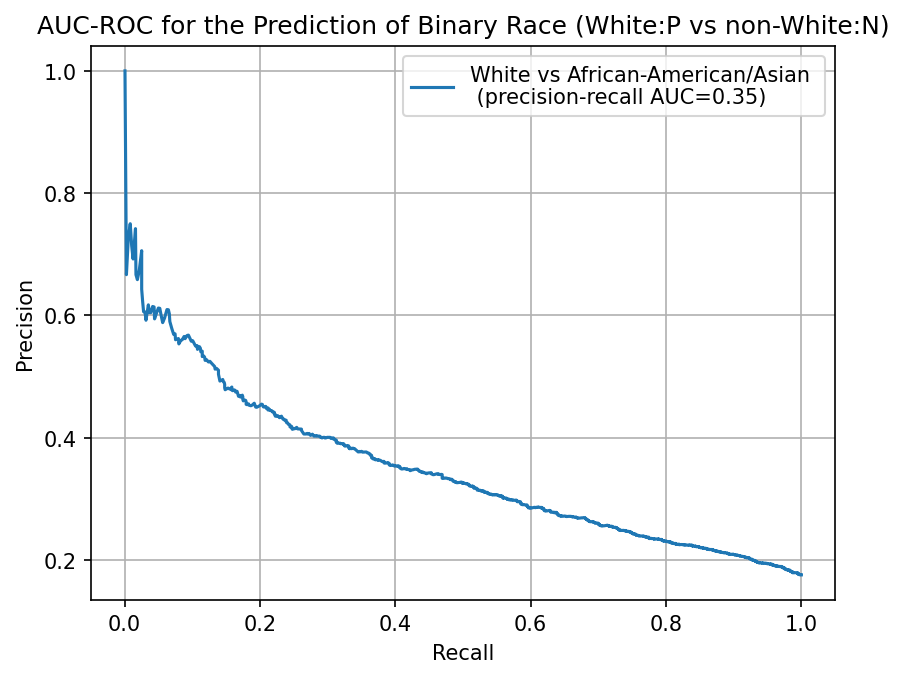

The optimum Threshold is: 0.64
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      6662
         1.0       0.42      0.24      0.31      1419

    accuracy                           0.81      8081
   macro avg       0.64      0.59      0.60      8081
weighted avg       0.78      0.81      0.79      8081

[[6201  461]
 [1079  340]]


In [74]:
name = 'chexpert_race_2_categ_full_'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_total = test_data['x_test']
y_chex_total = test_data['y_test']
mask_chex_total = test_data['mask_excluded']
model_chex_total = load_model(name + '_mdl.h5')
y_predict_chex_total = model_chex_total.predict(x_chex_total[:,mask_chex_total])
AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

253/253 [==============================] - 0s 954us/step


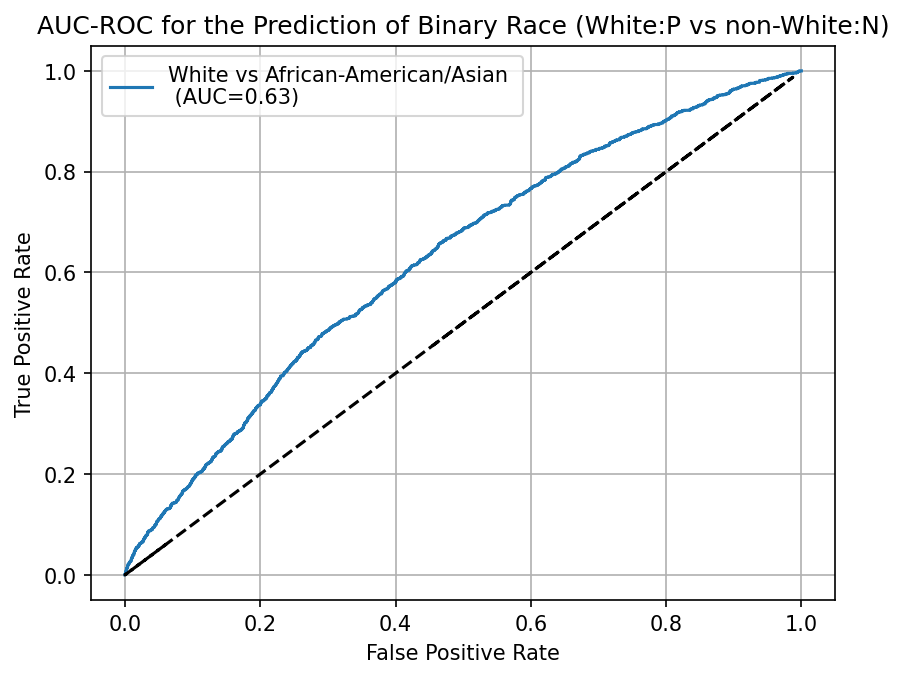

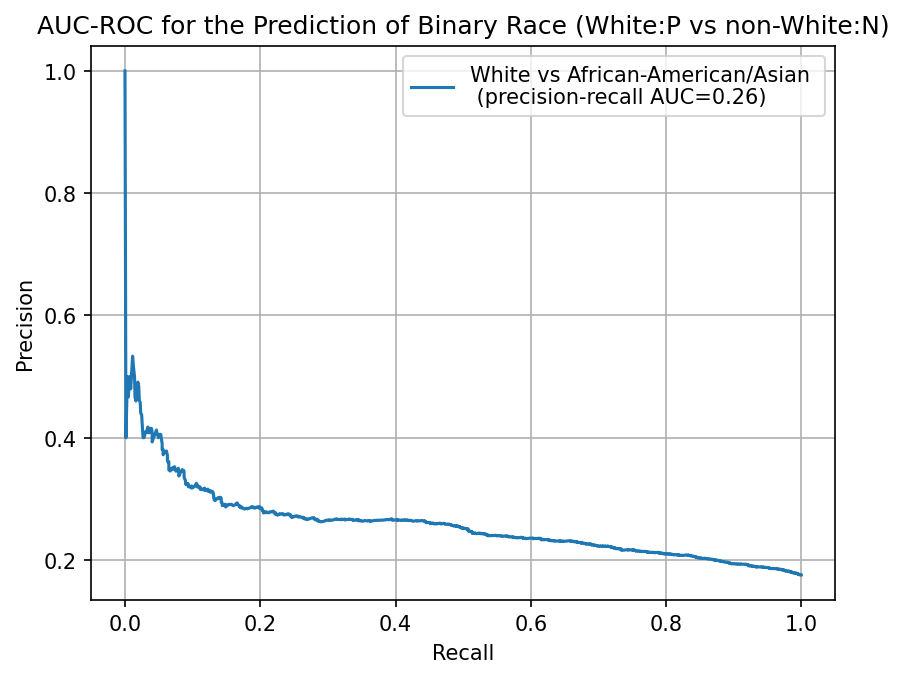

The optimum Threshold is: 0.59
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      6662
         1.0       0.30      0.14      0.19      1419

    accuracy                           0.79      8081
   macro avg       0.57      0.53      0.53      8081
weighted avg       0.74      0.79      0.76      8081

[[6211  451]
 [1227  192]]


In [75]:
name = 'chexpert_race_2_categ_segment_segment_0__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_seg_0 = test_data['x_test']
y_chex_seg_0 = test_data['y_test']
mask_chex_seg_0 = test_data['mask_excluded']
model_chex_seg_0 = load_model(name + '_mdl.h5')
y_predict_chex_seg_0 = model_chex_seg_0.predict(x_chex_seg_0[:,mask_chex_seg_0])
AUC_ROC_Binary(y_true=y_chex_seg_0,y_score=y_predict_chex_seg_0)
AUC_Precision_Recall(y_true=y_chex_seg_0,y_score=y_predict_chex_seg_0)
threshold = prob2categ(y_chex_seg_0,y_predict_chex_seg_0)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_seg_0.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_seg_0, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_seg_0, y_pred=class_pred)
print(cm)

253/253 [==============================] - 0s 971us/step


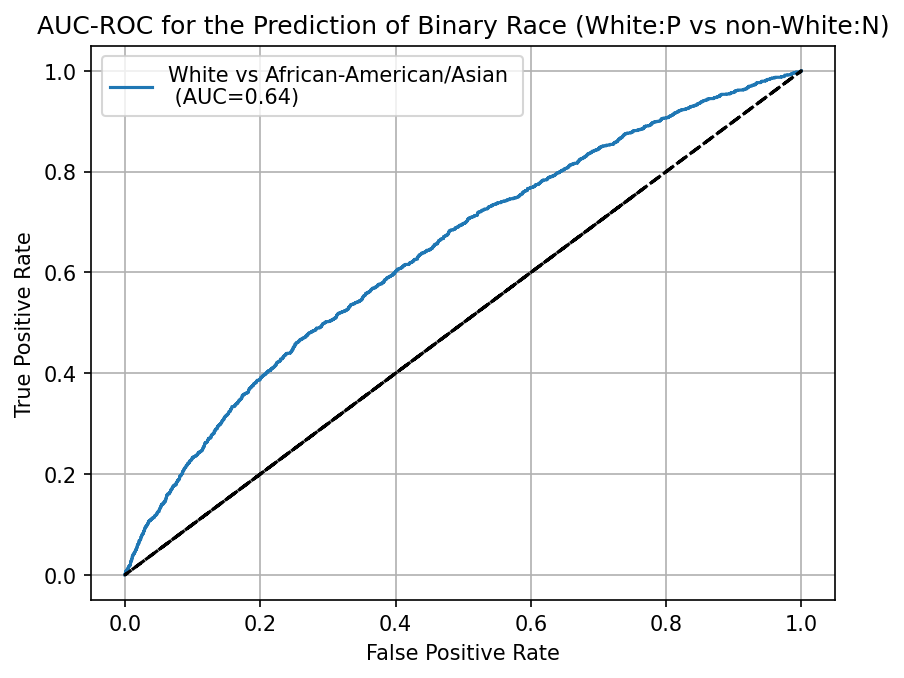

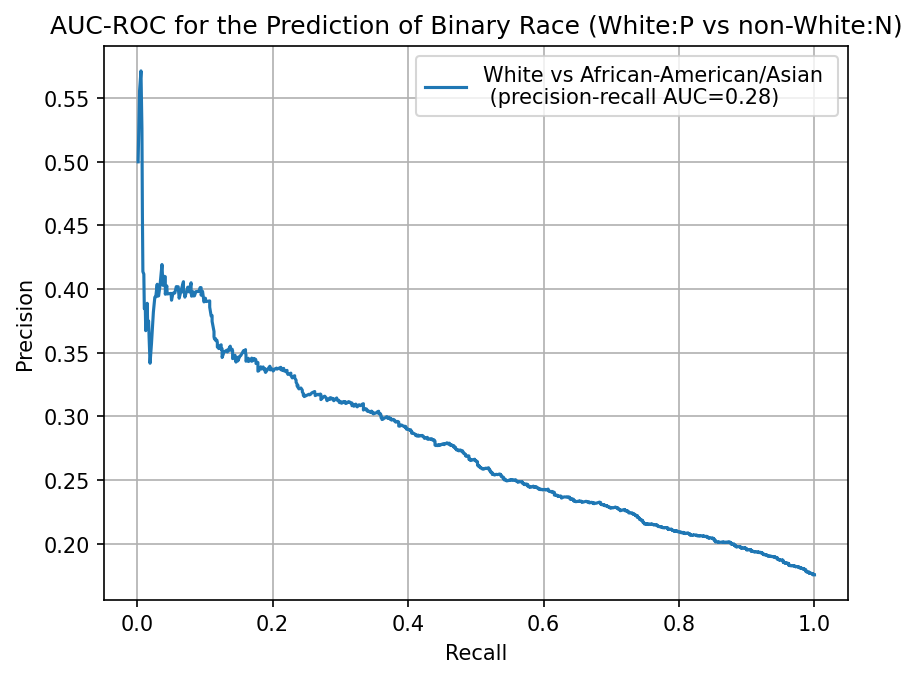

The optimum Threshold is: 0.60
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89      6662
         1.0       0.36      0.12      0.18      1419

    accuracy                           0.81      8081
   macro avg       0.60      0.54      0.53      8081
weighted avg       0.75      0.81      0.77      8081

[[6369  293]
 [1254  165]]


In [85]:
name = 'chexpert_race_2_categ_segment_segment_1__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_seg_1 = test_data['x_test']
y_chex_seg_1 = test_data['y_test']
mask_chex_seg_1 = test_data['mask_excluded']
model_chex_seg_1 = load_model(name + '_mdl.h5')
y_predict_chex_seg_1 = model_chex_seg_1.predict(x_chex_seg_1[:,mask_chex_seg_1])
AUC_ROC_Binary(y_true=y_chex_seg_1,y_score=y_predict_chex_seg_1)
AUC_Precision_Recall(y_true=y_chex_seg_1,y_score=y_predict_chex_seg_1)
threshold = prob2categ(y_chex_seg_1,y_predict_chex_seg_1)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_seg_1.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_seg_1, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_seg_1, y_pred=class_pred)
print(cm)

253/253 [==============================] - 0s 904us/step


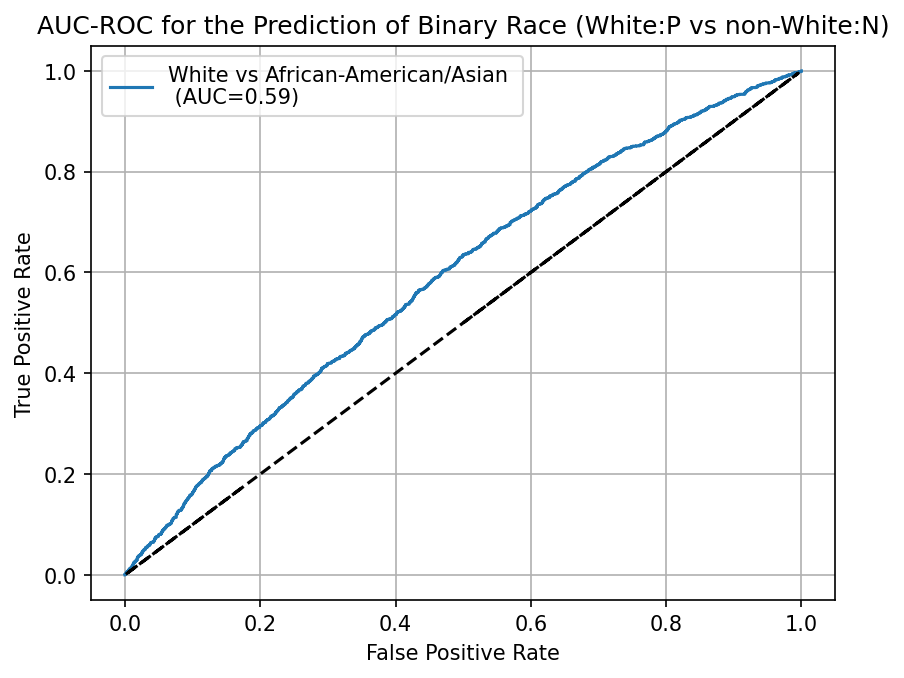

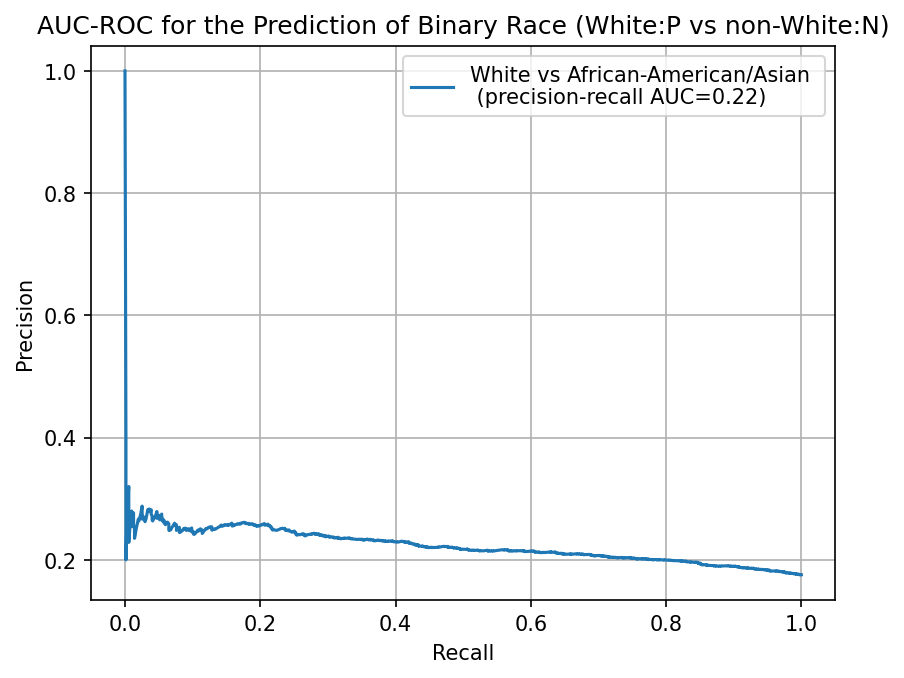

The optimum Threshold is: 0.57
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      6662
         1.0       0.25      0.08      0.12      1419

    accuracy                           0.80      8081
   macro avg       0.54      0.51      0.50      8081
weighted avg       0.73      0.80      0.75      8081

[[6332  330]
 [1310  109]]


In [86]:
name = 'chexpert_race_2_categ_segment_segment_2__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_seg_2 = test_data['x_test']
y_chex_seg_2 = test_data['y_test']
mask_chex_seg_2 = test_data['mask_excluded']
model_chex_seg_2 = load_model(name + '_mdl.h5')
y_predict_chex_seg_2 = model_chex_seg_2.predict(x_chex_seg_2[:,mask_chex_seg_2])
AUC_ROC_Binary(y_true=y_chex_seg_2,y_score=y_predict_chex_seg_2)
AUC_Precision_Recall(y_true=y_chex_seg_2,y_score=y_predict_chex_seg_2)
threshold = prob2categ(y_chex_seg_2,y_predict_chex_seg_2)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_seg_2.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_seg_2, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_seg_2, y_pred=class_pred)
print(cm)

253/253 [==============================] - 0s 794us/step


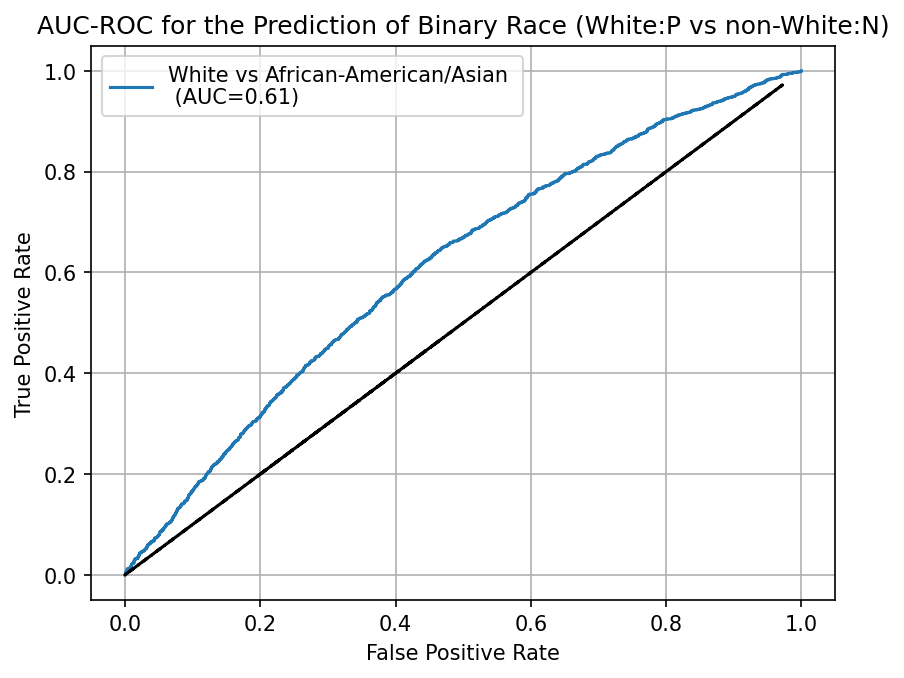

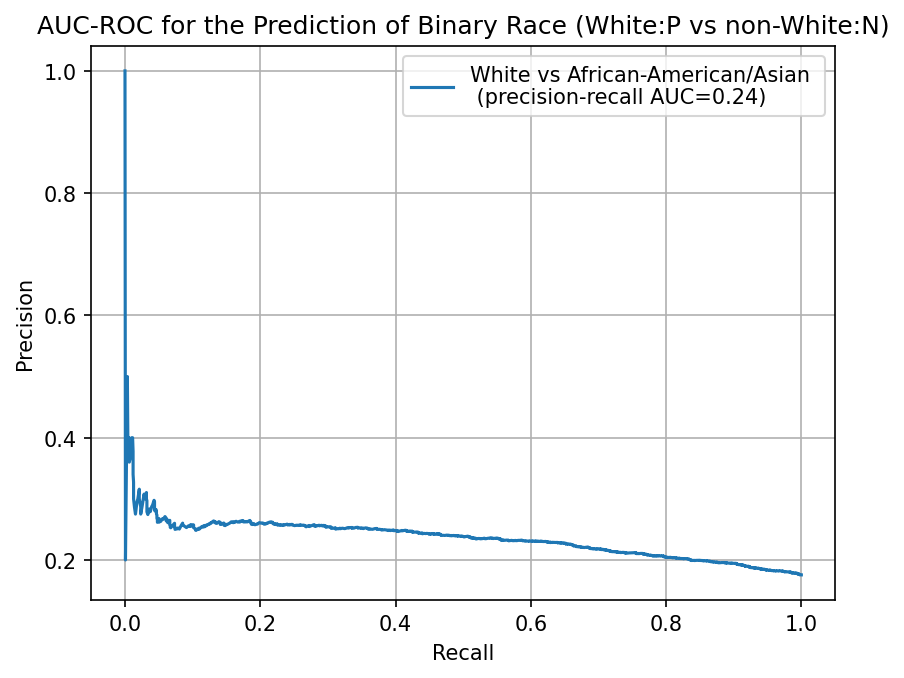

The optimum Threshold is: 0.59
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88      6662
         1.0       0.25      0.10      0.15      1419

    accuracy                           0.79      8081
   macro avg       0.54      0.52      0.51      8081
weighted avg       0.73      0.79      0.75      8081

[[6225  437]
 [1272  147]]


In [87]:
name = 'chexpert_race_2_categ_segment_segment_3__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_seg_3 = test_data['x_test']
y_chex_seg_3 = test_data['y_test']
mask_chex_seg_3 = test_data['mask_excluded']
model_chex_seg_3 = load_model(name + '_mdl.h5')
y_predict_chex_seg_3 = model_chex_seg_3.predict(x_chex_seg_3[:,mask_chex_seg_3])
AUC_ROC_Binary(y_true=y_chex_seg_3,y_score=y_predict_chex_seg_3)
AUC_Precision_Recall(y_true=y_chex_seg_3,y_score=y_predict_chex_seg_3)
threshold = prob2categ(y_chex_seg_3,y_predict_chex_seg_3)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_seg_3.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_seg_3, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_seg_3, y_pred=class_pred)
print(cm)